In [1]:
import pandas as pd
import numpy as np
import polars as pl
import time
from time import perf_counter

In [2]:
df_movies_pd = pd.read_csv('data/movies.csv')
df_movies_pl = pl.read_csv('data/movies.csv')

In [3]:
df_movies_pd.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_movies_pl.head()

movieId,title,genres
i64,str,str
1,"""Toy Story (1995)""","""Adventure|Animation|Children|C…"
2,"""Jumanji (1995)""","""Adventure|Children|Fantasy"""
3,"""Grumpier Old Men (1995)""","""Comedy|Romance"""
4,"""Waiting to Exhale (1995)""","""Comedy|Drama|Romance"""
5,"""Father of the Bride Part II (1…","""Comedy"""


In [5]:
def measure_time(func):
    start = perf_counter()
    result = func()
    end = perf_counter()
    time = end - start
    return result, time


def time_comparising(pandas_time, polars_time):
    print(f"Pandas time: {pandas_time:.5f} s")
    print(f"Polars time: {polars_time:.5f} s")

    try:
        if pandas_time > polars_time:
            diff = abs(pandas_time - polars_time) / (polars_time) * 100
            print(f"Polars: {diff:.5f}% faster")
        elif polars_time > pandas_time:
            diff = abs(pandas_time - polars_time) / (pandas_time) * 100
            print(f"Pandas: {diff:.5f}% faster")
        else:
            print("Both libraries took the same amount of time!")
    except ZeroDivisionError:
        return float('inf')  # Return inf if both values are zero
    except TypeError:
        return float('inf')  # Return inf if either value is not a number

In [6]:
times_pd = []
times_pl = []

In [7]:
counter = 1
print(f"Analysis {counter}: Read CSV file")

start = perf_counter()
df_pd = pd.read_csv('data/ratings.csv')
end = perf_counter()
pd_tm = end - start

start = perf_counter()
df_pl = pl.read_csv('data/ratings.csv', schema_overrides={"rating": pl.Float32})
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 1: Read CSV file
Pandas time: 0.24531 s
Polars time: 0.10302 s
Polars: 138.11871% faster


In [8]:
df_pd.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077.0
1,1,25,1.0,944250228.0
2,1,29,2.0,943230976.0
3,1,30,5.0,944249077.0
4,1,32,5.0,943228858.0


In [9]:
df_pl.head()

userId,movieId,rating,timestamp
i64,i64,f32,i64
1,17,4.0,944249077
1,25,1.0,944250228
1,29,2.0,943230976
1,30,5.0,944249077
1,32,5.0,943228858


In [12]:
limit_rows = 1000
df_pd = df_pd[:limit_rows]
df_pl = df_pl[:limit_rows]

df_pd.shape, df_pl.shape

((1000, 4), (1000, 4))

In [13]:
print(f"Analysis {counter}: Merge df")

start = perf_counter()
df_pd = pd.merge(df_pd, df_movies_pd, on="movieId", how="left")
end = perf_counter()
pd_tm = end - start

start = perf_counter()
df_pl = df_pl.join(df_movies_pl, on="movieId", how="left")
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 2: Merge df
Pandas time: 0.02736 s
Polars time: 0.09400 s
Pandas: 243.61760% faster


In [14]:
df_pd

,userId,movieId,rating,timestamp,title,genres
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
1,1,25,1.0,944250228,Leaving Las Vegas (1995),Drama|Romance
2,1,29,2.0,943230976,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
3,1,30,5.0,944249077,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
4,1,32,5.0,943228858,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
...,...,...,...,...,...,...
995,10,49651,1.5,1208464583,Rocky Balboa (2006),Action|Drama
996,10,50003,2.5,1212057236,DOA: Dead or Alive (2006),Action|Adventure
997,10,50794,2.5,1182204350,Smokin' Aces (2006),Action|Crime|Drama|Thriller
998,10,50798,1.5,1179314852,Epic Movie (2007),Adventure|Comedy


In [15]:
df_pl

userId,movieId,rating,timestamp,title,genres
i64,i64,f32,i64,str,str
1,17,4.0,944249077,"""Sense and Sensibility (1995)""","""Drama|Romance"""
1,25,1.0,944250228,"""Leaving Las Vegas (1995)""","""Drama|Romance"""
1,29,2.0,943230976,"""City of Lost Children, The (Ci…","""Adventure|Drama|Fantasy|Myster…"
1,30,5.0,944249077,"""Shanghai Triad (Yao a yao yao …","""Crime|Drama"""
1,32,5.0,943228858,"""Twelve Monkeys (a.k.a. 12 Monk…","""Mystery|Sci-Fi|Thriller"""
…,…,…,…,…,…
10,49651,1.5,1208464583,"""Rocky Balboa (2006)""","""Action|Drama"""
10,50003,2.5,1212057236,"""DOA: Dead or Alive (2006)""","""Action|Adventure"""
10,50794,2.5,1182204350,"""Smokin' Aces (2006)""","""Action|Crime|Drama|Thriller"""


In [16]:
print(f"Analysis {counter}: Head of Dataframe")

start = perf_counter()
print(df_pd.head())
end = perf_counter()
pd_tm = end - start

start = perf_counter()
print(df_pl.head())
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 3: Head of Dataframe
   userId  movieId  rating  timestamp  \
0       1       17     4.0  944249077   
1       1       25     1.0  944250228   
2       1       29     2.0  943230976   
3       1       30     5.0  944249077   
4       1       32     5.0  943228858   

                                               title  \
0                       Sense and Sensibility (1995)   
1                           Leaving Las Vegas (1995)   
2  City of Lost Children, The (Cité des enfants p...   
3  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
4          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   

                                   genres  
0                           Drama|Romance  
1                           Drama|Romance  
2  Adventure|Drama|Fantasy|Mystery|Sci-Fi  
3                             Crime|Drama  
4                 Mystery|Sci-Fi|Thriller  
shape: (5, 6)
┌────────┬─────────┬────────┬───────────┬─────────────────────────────┬────────────────────────────┐
│ userI

In [17]:
print(f"Analysis {counter}: Tail of Dataframe")

start = perf_counter()
print(df_pd.tail())
end = perf_counter()
pd_tm = end - start

start = perf_counter()
print(df_pl.tail())
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 4: Tail of Dataframe
     userId  movieId  rating   timestamp                      title  \
995      10    49651     1.5  1208464583        Rocky Balboa (2006)   
996      10    50003     2.5  1212057236  DOA: Dead or Alive (2006)   
997      10    50794     2.5  1182204350        Smokin' Aces (2006)   
998      10    50798     1.5  1179314852          Epic Movie (2007)   
999      10    50804     3.5  1173039429     Hannibal Rising (2007)   

                          genres  
995                 Action|Drama  
996             Action|Adventure  
997  Action|Crime|Drama|Thriller  
998             Adventure|Comedy  
999        Drama|Horror|Thriller  
shape: (5, 6)
┌────────┬─────────┬────────┬────────────┬───────────────────────────┬─────────────────────────────┐
│ userId ┆ movieId ┆ rating ┆ timestamp  ┆ title                     ┆ genres                      │
│ ---    ┆ ---     ┆ ---    ┆ ---        ┆ ---                       ┆ ---                         │
│ i64    ┆ i64  

In [18]:
print(f"Analysis {counter}: Mean of Rating Column")

start = perf_counter()
df_pd['mean'] = df_pd['rating'].mean()
start = perf_counter()
end = perf_counter()
pd_tm = end - start

start = perf_counter()
df_pl = df_pl.with_columns(pl.col('rating').mean().alias('mean'))
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 5: Mean of Rating Column
Pandas time: 0.00011 s
Polars time: 0.01174 s
Pandas: 10311.95249% faster


In [19]:
print(f"Analysis {counter}: Standard Deviation of Rating Column")

start = perf_counter()
df_pd['std'] = df_pd['rating'].std()
start = perf_counter()
end = perf_counter()
pd_tm = end - start

start = perf_counter()
df_pl = df_pl.with_columns(pl.col('rating').std().alias('std'))
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 6: Standard Deviation of Rating Column
Pandas time: 0.00006 s
Polars time: 0.00392 s
Pandas: 6845.88037% faster


In [20]:
# Analysis: Groupby and mean
print(f"Analysis {counter}: Groupby and Mean")

start = perf_counter()
pandas_result = df_pd.groupby('userId')['rating'].mean()
end = perf_counter()
pd_tm = end - start

start = perf_counter()
polars_result = df_pl.group_by('userId').agg(pl.col('rating').mean())
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 7: Groupby and Mean
Pandas time: 0.00654 s
Polars time: 0.04345 s
Pandas: 564.32296% faster


In [21]:
pandas_result

,rating
userId,
1,3.531915
2,4.269231
3,3.588435
4,2.629630
5,3.272727
6,4.173077
7,3.636364
8,4.322581
9,4.241379


In [22]:
# Value Counts
print(f"\nAnalysis {counter}: Value Counts")

start = perf_counter()
pandas_result = df_pd['rating'].value_counts()
end = perf_counter()
pd_tm = end - start

start = perf_counter()
polars_result = df_pl['rating'].value_counts()
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1


Analysis 8: Value Counts
Pandas time: 0.00384 s
Polars time: 0.00041 s
Polars: 842.21535% faster


In [23]:
# Filtering and counting
print(f"\nAnalysis {counter}: Filtering and Counting")

start = perf_counter()
pandas_result = df_pd[df_pd['rating'] > 3].shape[0]
end = perf_counter()
pd_tm = end - start

start = perf_counter()
polars_result = df_pl.filter(pl.col("rating") > 3).shape[0]
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1


Analysis 9: Filtering and Counting
Pandas time: 0.00283 s
Polars time: 0.02282 s
Pandas: 707.01198% faster


In [24]:
# Sorting
print(f"Analysis {counter}: Sorting")

# Pandas Sorting
start = perf_counter()
pandas_result = df_pd.sort_values(by='rating', ascending=False)
end = perf_counter()
pd_tm = end - start

# Polars Sorting
start = perf_counter()
polars_result = df_pl.sort('rating', descending=True)
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 10: Sorting
Pandas time: 0.00150 s
Polars time: 0.00790 s
Pandas: 427.70854% faster


In [25]:
# Window Functions
print(f"Analysis {counter}: Window Functions")

start = perf_counter()
df_pd['cumulative_sum'] = df_pd.groupby('userId')['rating'].cumsum()
end = perf_counter()
pd_tm = end - start

start = perf_counter()
df_pl = df_pl.with_columns(pl.col('rating').cum_sum().over('userId').alias('cumulative_sum'))
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 11: Window Functions
Pandas time: 0.00840 s
Polars time: 0.01153 s
Pandas: 37.29460% faster


In [26]:
# Criação de Novas Colunas (Expressões)
print(f"Analysis {counter}: Column Creation")

start = perf_counter()
df_pd['new_column'] = df_pd['rating'] * 2 + df_pd['userId']
end = perf_counter()
pd_tm = end - start

start = perf_counter()
df_pl = df_pl.with_columns((pl.col('rating') * 2 + pl.col('userId')).alias('new_column'))
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 12: Column Creation
Pandas time: 0.00323 s
Polars time: 0.00581 s
Pandas: 79.86808% faster


In [27]:
# Redução em Várias Colunas
print(f"Analysis {counter}: Column Reduction")

start = perf_counter()
pandas_result = df_pd[['rating', 'userId']].sum(axis=1)
end = perf_counter()
pd_tm = end - start

start = perf_counter()
polars_result = df_pl.select((pl.col('rating') + pl.col('userId')).alias('sum_cols'))
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 13: Column Reduction
Pandas time: 0.00608 s
Polars time: 0.00270 s
Polars: 125.26888% faster


In [28]:
# Operações Matemáticas em Lote
print(f"Analysis {counter}: Batch Mathematical Operations")

start = perf_counter()
pandas_result = df_pd['userId'].apply(lambda x: x ** 2 + 3 * x + 2)
end = perf_counter()
pd_tm = end - start

start = perf_counter()
polars_result = df_pl.with_columns((pl.col('userId') ** 2 + 3 * pl.col('userId') + 2).alias('new_col'))
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 14: Batch Mathematical Operations
Pandas time: 0.00263 s
Polars time: 0.01722 s
Pandas: 555.03061% faster


In [29]:
def pandas_operations():
    # Filtrar ratings acima de 4 e ordenar
    filtered = df_pd[df_pd["rating"] > 4].sort_values("timestamp")

    # Groupby para calcular a média de rating por item
    group = filtered.groupby("movieId")["rating"].mean().reset_index()

    # Adicionar uma nova coluna calculando um z-score (operação custosa)
    df_pd["z_score"] = (df_pd["rating"] - df_pd["rating"].mean()) / df_pd["rating"].std()

    # Filtrar novamente para itens com mais de 500 avaliações
    final = filtered.groupby("movieId").filter(lambda x: len(x) > 500)
    return final

def polars_operations():
    # Filtrar ratings acima de 4 e ordenar
    filtered = df_pl.filter(pl.col("rating") > 4).sort("timestamp")

    # Groupby para calcular a média de rating por item
    group = filtered.group_by("movieId").agg(pl.col("rating").mean())

    # Adicionar uma nova coluna calculando um z-score (operação custosa)
    df_polars = df_pl.with_columns(
        ((pl.col("rating") - pl.col("rating").mean()) / pl.col("rating").std()).alias("z_score")
    )

    # Contar o número de avaliações por item
    counts = filtered.group_by("movieId").agg(pl.count("userId").alias("num_ratings"))

    # Filtrar os itens com mais de 500 avaliações
    filtered_counts = counts.filter(pl.col("num_ratings") > 500)

    # Combinar com os dados filtrados originais
    final = filtered.join(filtered_counts, on="movieId", how="inner")
    return final

In [30]:
# Operação Custosa
print(f"Analysis {counter}: Filter, Group, create column, filter again")

start = perf_counter()
_ = pandas_operations()
end = perf_counter()
pd_tm = end - start

start = perf_counter()
_ = polars_operations()
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 15: Filter, Group, create column, filter again
Pandas time: 0.02043 s
Polars time: 0.01647 s
Polars: 24.04194% faster


In [31]:
# Winner: Counter
def winner_counter(times_pd, times_pl):
    counter_pd = 0
    counter_pl = 0

    for i in range(len(times_pd)):
        if times_pd[i] > times_pl[i]:
            counter_pd += 1
        elif times_pd[i] < times_pl[i]:
            counter_pl += 1

    if counter_pd > counter_pl:
        winner = "Pandas"
    elif counter_pd < counter_pl:
        winner = "Polars"
    else:
        winner = "Draw"
    return winner, counter_pd, counter_pl

In [32]:
time_comparising(np.mean(times_pd), np.mean(times_pl))

Pandas time: 0.02244 s
Polars time: 0.02269 s
Pandas: 1.10595% faster


In [33]:
winner, counter_pd, counter_pl = winner_counter(times_pd, times_pl)
print(f"Winner: {winner}")
print(f"Counter Pandas: {counter_pd}")
print(f"Counter Polars: {counter_pl}")

Winner: Polars
Counter Pandas: 6
Counter Polars: 9


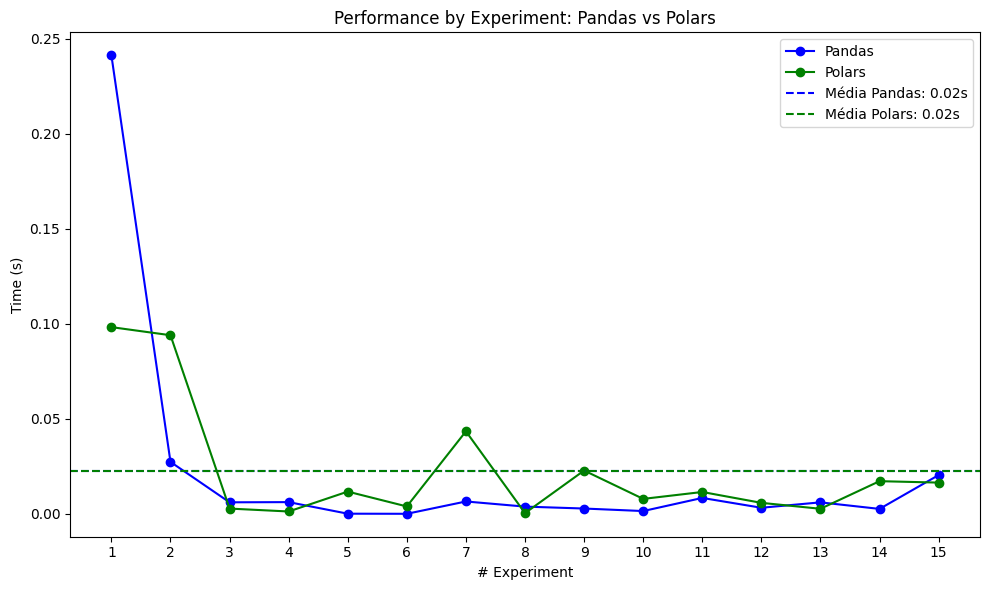

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Calculating the averages
mean_pd = np.mean(times_pd)
mean_pl = np.mean(times_pl)

# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting the execution times for Pandas and Polars
plt.plot(range(1, len(times_pd) + 1), times_pd, 'o-', label='Pandas', color='blue')
plt.plot(range(1, len(times_pl) + 1), times_pl, 'o-', label='Polars', color='green')

# Adding the horizontal lines for the averages
plt.axhline(y=mean_pd, color='blue', linestyle='--', label=f'Média Pandas: {mean_pd:.2f}s')
plt.axhline(y=mean_pl, color='green', linestyle='--', label=f'Média Polars: {mean_pl:.2f}s')

# Configuring the plotplt.title('Desempenho de Tempo por Experimento: Pandas vs Polars')
plt.title('Performance by Experiment: Pandas vs Polars')
plt.xlabel('# Experiment')
plt.ylabel('Time (s)')
plt.legend()

# Setting x-ticks to display all experiment numbers
plt.xticks(range(1, len(times_pd) + 1))  # Adjusting x-axis ticks to show all experiment numbers

# Displaying the plot
plt.tight_layout()
plt.show()